# Map search

In [266]:
BEIJING, CHANGCHUN, MULUMUQI, WUHAN, GUANGZHOU, SHENZHEN, BANGKOK, SHANGHAI, NEWYORK = """
BEIJING CHANGCHUN MULUMUQI WUHAN GUANGZHOU SHENZHEN BANGKOK SHANGHAI NEWYORK
""".split()

把名称都列出来，防止后续出现拼写错误,

In [267]:
dictionary = {}

In [268]:
connection={
           CHANGCHUN:[BEIJING],
           MULUMUQI:[BEIJING],
           BEIJING:[MULUMUQI,CHANGCHUN, WUHAN, SHENZHEN, NEWYORK],
           NEWYORK:[BEIJING,SHANGHAI],
           SHANGHAI: [NEWYORK, WUHAN],
           WUHAN: [SHANGHAI, BEIJING, GUANGZHOU],
           GUANGZHOU: [WUHAN, BANGKOK],
           SHENZHEN: [WUHAN, BANGKOK],
           BANGKOK: [SHENZHEN, GUANGZHOU]
           }

In [269]:
import networkx as nx

In [270]:
%matplotlib inline

In [271]:
graph= connection

In [272]:
g= nx.Graph(graph)

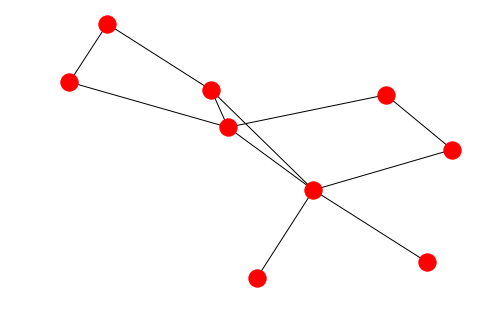

In [273]:
nx.draw(g)

In [274]:
def nagivator(start, destination, connection_graph):
    pathes = [[start] ]
    seen = set()
    
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        
        if froniter in seen: continue
            
        successors = connection_graph[froniter]
        
        for s in successors: 
            if s == destination: 
                path.append(s)
                return path
            else:
                pathes.append(path + [s])  
                
        pathes = sorted(pathes, key=len) # 最小换成
                
        seen.add(froniter)

In [275]:
nagivator(BEIJING,GUANGZHOU, connection)

['BEIJING', 'WUHAN', 'GUANGZHOU']